# Modelo Machine Learning

Este modelo tiene por objetivo predecir la variable `presunta_infraccion` y `tipo` dado un vector de características. Es decir, el problema es de clasificación, donde se busca encontrar un $\psi:\mathbb{R}^n \to \mathbb{R}^k$. Donde $n$ es el número de `features` y $k$, el número de clases y $X \in \mathbb{R}^n$

In [21]:
import pandas as pd
import numpy as np

path_data = 'data/mdi_detenidos_2024_biased.csv'
df = pd.read_csv(path_data)
df.shape

(41510, 15)

In [22]:
df.head()

,tipo,estado_civil,estatus_migratorio,edad,sexo,genero,nacionalidad,autoidentificacion_etnica,nivel_de_instruccion,movilizacion,tipo_arma,arma,tipo_lugar,nombre_provincia,presunta_infraccion
0,APREHENDIDO,SOLTERO/A,NO APLICA,19,HOMBRE,MASCULINO,ECUATORIANO,MESTIZO/A,TERCER NIVEL TÉCNICO-TECNOLÓGICO Y DE GRADO,A PIE,NINGUNA,NINGUNA,ÁREA DE ACCESO PÚBLICO,BOLÍVAR,OTROS
1,DETENIDO,CASADO/A,NO APLICA,40,HOMBRE,MASCULINO,ECUATORIANO,INDÍGENA,EDUCACIÓN GENERAL BÁSICA,A PIE,NINGUNA,NINGUNA,ÁREA PRIVADA,NAPO,OTROS
2,APREHENDIDO,SOLTERO/A,NO APLICA,36,HOMBRE,FEMENINO,ECUATORIANO,MESTIZO/A,NO APLICA,NO APLICA,NINGUNA,NINGUNA,ÁREAS DEDICADAS AL COMERCIO,PICHINCHA,OTROS
3,APREHENDIDO,SOLTERO/A,NO APLICA,26,HOMBRE,MASCULINO,ECUATORIANO,MESTIZO/A,BACHILLERATO,A PIE,NINGUNA,NINGUNA,ÁREA DE ACCESO PÚBLICO,PICHINCHA,DELITOS CONTRA EL DERECHO A LA PROPIEDAD
4,APREHENDIDO,DIVORCIADO/A,NO APLICA,34,HOMBRE,MASCULINO,ECUATORIANO,SE DESCONOCE,SE DESCONOCE,A PIE,NINGUNA,NINGUNA,ÁREA DE ACCESO PÚBLICO,AZUAY,OTROS


In [23]:
df.dtypes

tipo                         object
estado_civil                 object
estatus_migratorio           object
edad                         object
sexo                         object
genero                       object
nacionalidad                 object
autoidentificacion_etnica    object
nivel_de_instruccion         object
movilizacion                 object
tipo_arma                    object
arma                         object
tipo_lugar                   object
nombre_provincia             object
presunta_infraccion          object
dtype: object

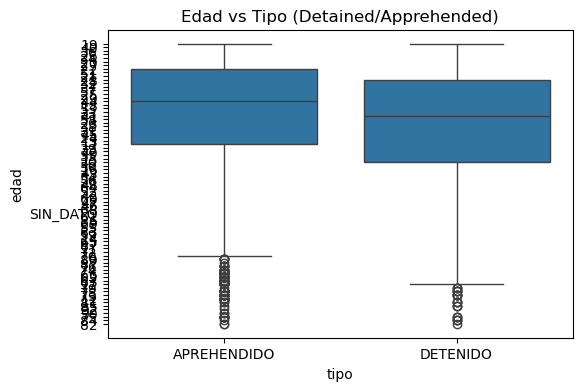

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Numeric correlation (Pearson)
plt.figure(figsize=(6,4))
sns.boxplot(x="tipo", y="edad", data=df)
plt.title("Edad vs Tipo (Detained/Apprehended)")
plt.show()

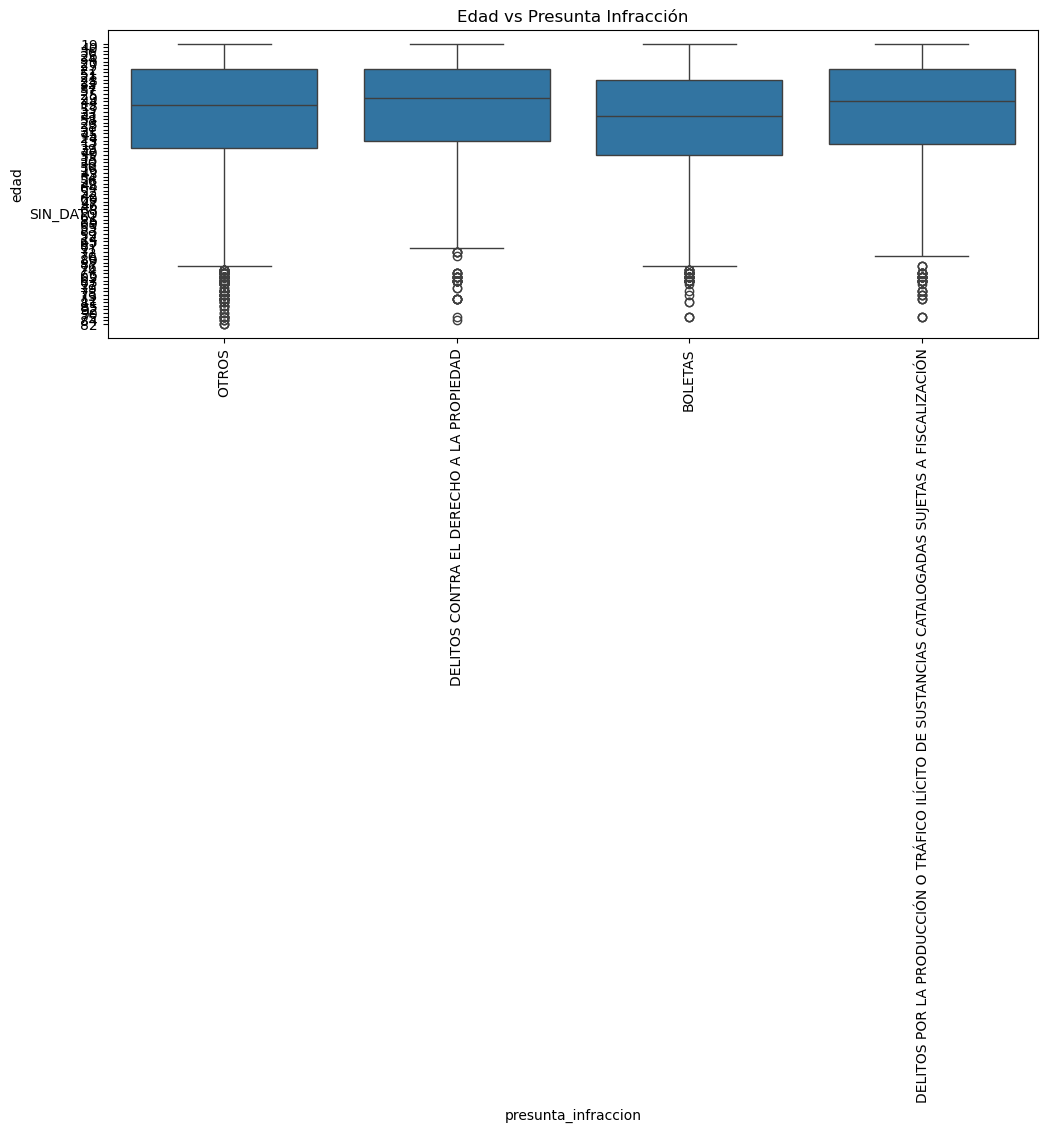

In [25]:
plt.figure(figsize=(12,4))
sns.boxplot(x="presunta_infraccion", y="edad", data=df)
plt.xticks(rotation=90)
plt.title("Edad vs Presunta Infracción")
plt.show()

In [26]:
from scipy.stats import chi2_contingency

# --- Function for Cramér's V (categorical correlation)
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt((chi2/n) / (min(k-1, r-1)))

# Compute categorical correlations with targets
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    if col not in ["tipo","presunta_infraccion"]:
        print(f"{col} vs tipo (Cramér's V): {cramers_v(df[col], df['tipo']):.3f}")
        print(f"{col} vs presunta_infraccion (Cramér's V): {cramers_v(df[col], df['presunta_infraccion']):.3f}")

estado_civil vs tipo (Cramér's V): 0.192
estado_civil vs presunta_infraccion (Cramér's V): 0.146
estatus_migratorio vs tipo (Cramér's V): 0.080
estatus_migratorio vs presunta_infraccion (Cramér's V): 0.051
edad vs tipo (Cramér's V): 0.231
edad vs presunta_infraccion (Cramér's V): 0.149
sexo vs tipo (Cramér's V): 0.034
sexo vs presunta_infraccion (Cramér's V): 0.069
genero vs tipo (Cramér's V): 0.033
genero vs presunta_infraccion (Cramér's V): 0.058
nacionalidad vs tipo (Cramér's V): 0.084
nacionalidad vs presunta_infraccion (Cramér's V): 0.069
autoidentificacion_etnica vs tipo (Cramér's V): 0.077
autoidentificacion_etnica vs presunta_infraccion (Cramér's V): 0.072
nivel_de_instruccion vs tipo (Cramér's V): 0.149
nivel_de_instruccion vs presunta_infraccion (Cramér's V): 0.116
movilizacion vs tipo (Cramér's V): 0.148
movilizacion vs presunta_infraccion (Cramér's V): 0.140
tipo_arma vs tipo (Cramér's V): 0.159
tipo_arma vs presunta_infraccion (Cramér's V): 0.160
arma vs tipo (Cramér's V):

In [27]:
# df.drop(columns=["codigo_provincia"], inplace=True)
# df.shape

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Encode categorical features
df_encoded = df.copy()
encoders = {}
for col in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    encoders[col] = le


# Features and targets
X = df_encoded.drop(["tipo","presunta_infraccion"], axis=1)

y_tipo = df_encoded["tipo"]
y_infraccion = df_encoded["presunta_infraccion"]

X.shape, y_tipo.shape, y_infraccion.shape

((41510, 13), (41510,), (41510,))

In [29]:
X.sample(5)

,estado_civil,estatus_migratorio,edad,sexo,genero,nacionalidad,autoidentificacion_etnica,nivel_de_instruccion,movilizacion,tipo_arma,arma,tipo_lugar,nombre_provincia
480,3,3,13,0,1,11,14,5,11,2,16,15,20
22339,0,3,22,0,1,11,14,0,0,2,16,7,13
9523,3,3,13,0,1,11,14,5,2,2,16,15,5
2421,3,1,17,0,1,11,14,2,0,2,16,13,3
8880,0,1,17,0,1,11,14,5,11,2,16,15,19


In [30]:
# Example: print mapping for "presunta_infraccion"
this_feature = "estado_civil"
print(dict(zip(encoders[this_feature].classes_, 
               encoders[this_feature].transform(encoders[this_feature].classes_))))

{'CASADO/A': 0, 'DIVORCIADO/A': 1, 'SE DESCONOCE': 2, 'SOLTERO/A': 3, 'UNIÓN DE HECHO': 4, 'VIUDO/A': 5}


In [31]:
# Example: print mapping for "presunta_infraccion"
this_feature = "tipo_lugar"
print(dict(zip(encoders[this_feature].classes_, 
               encoders[this_feature].transform(encoders[this_feature].classes_))))

{'CENTRO DE ADOLESCENTES INFRACTORES (CAI)': 0, 'CENTRO DE PRIVACIÓN PROVISIONAL DE LIBERTAD (CPPL)': 1, 'CENTRO DE REHABILITACIÓN SOCIAL (CRS)': 2, 'CENTROS DE DIVERSIÓN': 3, 'ENTIDADES FINANCIERAS': 4, 'ENTIDADES PUBLICAS': 5, 'INSTITUCIONES DE SALUD': 6, 'INSTITUCIONES EDUCATIVAS': 7, 'LUGARES QUE PRESTAN SERVICIOS': 8, 'ORGANISMOS INTERNACIONALES': 9, 'TRANSPORTE': 10, 'UNIDADES DE ASEGURAMIENTO TRANSITORIO (UAT)': 11, 'UNIDADES DE REACCIÓN Y EMERGENCIA': 12, 'VIVIENDA/ALOJAMIENTO': 13, 'ZONA DE INSPECCIÓN': 14, 'ÁREA DE ACCESO PÚBLICO': 15, 'ÁREA PRIVADA': 16, 'ÁREAS DEDICADAS AL COMERCIO': 17}


In [32]:
# Example: print mapping for "presunta_infraccion"
this_feature = "nombre_provincia"
print(dict(zip(encoders[this_feature].classes_, 
               encoders[this_feature].transform(encoders[this_feature].classes_))))

{'AZUAY': 0, 'BOLÍVAR': 1, 'CARCHI': 2, 'CAÑAR': 3, 'CHIMBORAZO': 4, 'COTOPAXI': 5, 'EL ORO': 6, 'ESMERALDAS': 7, 'GALÁPAGOS': 8, 'GUAYAS': 9, 'IMBABURA': 10, 'LOJA': 11, 'LOS RÍOS': 12, 'MANABÍ': 13, 'MAR TERRITORIAL': 14, 'MORONA SANTIAGO': 15, 'NAPO': 16, 'ORELLANA': 17, 'PASTAZA': 18, 'PICHINCHA': 19, 'SANTA ELENA': 20, 'STO DGO DE LOS TSÁCHILAS': 21, 'SUCUMBÍOS': 22, 'TUNGURAHUA': 23, 'ZAMORA CHINCHIPE': 24}


In [33]:
# Example: print mapping for "presunta_infraccion"
this_feature = "tipo"
tipo_dict = dict(zip(encoders[this_feature].classes_, 
               encoders[this_feature].transform(encoders[this_feature].classes_)))
tipo_dict

{'APREHENDIDO': 0, 'DETENIDO': 1}

In [34]:
# Example: print mapping for "presunta_infraccion"
this_feature = "presunta_infraccion"
presunta_infraccion_dict = dict(zip(encoders[this_feature].classes_, 
               encoders[this_feature].transform(encoders[this_feature].classes_)))
presunta_infraccion_dict

{'BOLETAS': 0,
 'DELITOS CONTRA EL DERECHO A LA PROPIEDAD': 1,
 'DELITOS POR LA PRODUCCIÓN O TRÁFICO ILÍCITO DE SUSTANCIAS CATALOGADAS SUJETAS A FISCALIZACIÓN': 2,
 'OTROS': 3}

In [35]:
# --- Train/test split
X_train, X_test, y_tipo_train, y_tipo_test = train_test_split(X, y_tipo, test_size=0.2, random_state=42)
X_train2, X_test2, y_infr_train, y_infr_test = train_test_split(X, y_infraccion, test_size=0.2, random_state=42)

In [36]:
X_train.shape, X_test.shape, y_tipo_train.shape, y_tipo_test.shape

((33208, 13), (8302, 13), (33208,), (8302,))

In [37]:
# --- Model 1: tipo (binary)
rf_tipo = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
rf_tipo.fit(X_train, y_tipo_train)
y_tipo_pred = rf_tipo.predict(X_test)
print("=== Tipo (Detained vs Apprehended) ===")
print(classification_report(y_tipo_test, y_tipo_pred))

=== Tipo (Detained vs Apprehended) ===
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      6274
           1       0.50      0.37      0.42      2028

    accuracy                           0.75      8302
   macro avg       0.65      0.62      0.63      8302
weighted avg       0.73      0.75      0.74      8302



In [39]:
# --- Model 2: presunta_infraccion (multiclass)
rf_infr = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
rf_infr.fit(X_train2, y_infr_train)
y_infr_pred = rf_infr.predict(X_test2)
print("=== Presunta Infracción (Crime Category) ===")
print(classification_report(y_infr_test, y_infr_pred))

=== Presunta Infracción (Crime Category) ===
              precision    recall  f1-score   support

           0       0.42      0.37      0.39      1302
           1       0.40      0.30      0.34      1462
           2       0.40      0.37      0.38      1223
           3       0.64      0.73      0.68      4315

    accuracy                           0.54      8302
   macro avg       0.46      0.44      0.45      8302
weighted avg       0.53      0.54      0.53      8302

